In [1]:
import requests
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
class FlakyClient:
    def __init__(self, base_url="https://localhost:44343"):
        self._base_url =  base_url
    
    def call_status(self):
        response = requests.get(f"{self._base_url}/CircuitBreaker/Status", verify=False)
        return response.status_code, response.json()
    
    def call_reset(self):
        response = requests.get(f"{self._base_url}/CircuitBreaker/Reset", verify=False)
        return response.status_code
    
    def call_settings(self):
        response = requests.get(f"{self._base_url}/CircuitBreaker/Settings", verify=False)
        return response.status_code, response.json()

{'time_of_first_failure': 40, 'total_time_of_interval': 60}
200 200 200 200 200 200 200 200 200 200 503 200 503 200 200 200 200 200 503 200 200 200 503 503 503 503 503 503 503 503 503 200 503 200 200 200 503 503 503 200 503 503 503 503 503 503 503 200 200 503 503 200 200 503 503 503 200 200 200 503 

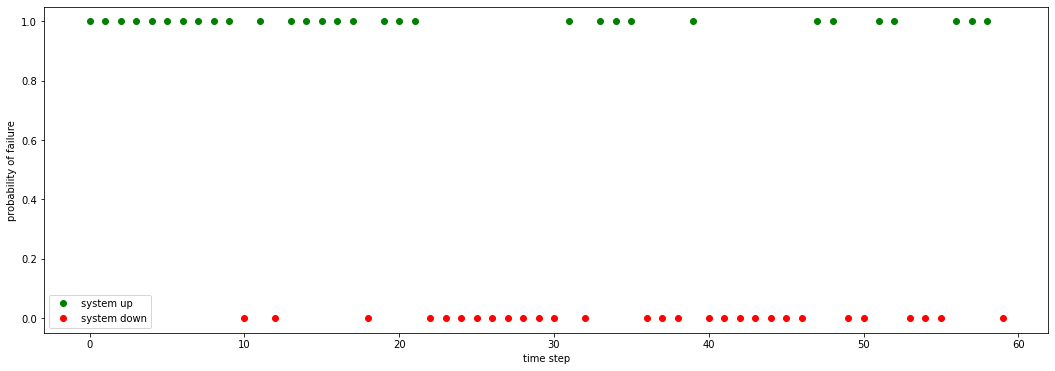

In [8]:
flaky_clinet = FlakyClient()
status_code,settings=flaky_clinet.call_settings()
assert status_code == 200
print(settings)
total_requests= settings['total_time_of_interval'] * 1
status_code=flaky_clinet.call_reset()

ups =  np.zeros(total_requests)
downs = np.zeros(total_requests)
for i in range(total_requests):
    status_code, info = flaky_clinet.call_status()
    print(status_code, end=' ')
    if status_code == 200:
        ups[i] = 1
        downs[i] = np.nan
    else:
        ups[i] = np.nan
        downs[i] = 0
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(range(total_requests), ups, 'go', label='system up')
ax.plot(range(total_requests), downs, 'ro', label='system down')
ax.set_xlabel('time step')  # Add an x-label to the axes.
ax.set_ylabel('probability of failure')  # Add a y-label to the axes.
ax.legend()